In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd


In [2]:

# Load the CSV file into a DataFrame
apple_df = pd.read_csv('Apple.csv')


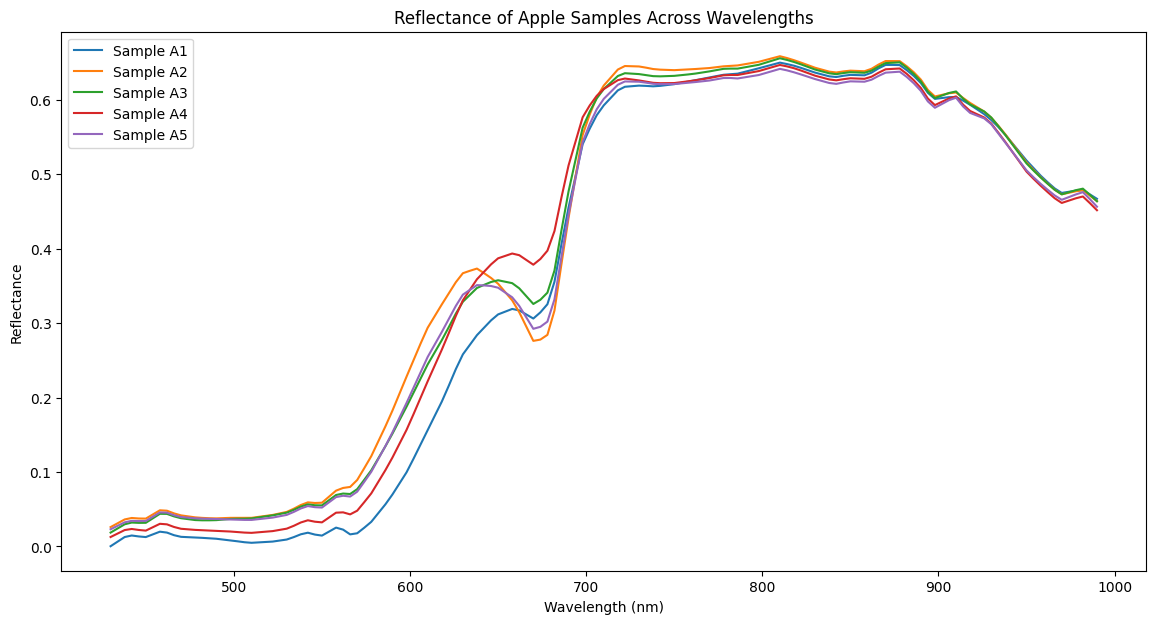

In [3]:

# Select a few samples to plot reflectance
sample_ids = [0, 1, 2, 3, 4]
wavelengths = apple_df.columns[2:].astype(int)  # Extract wavelengths

plt.figure(figsize=(14, 7))

for sample_id in sample_ids:
    plt.plot(wavelengths, apple_df.iloc[sample_id, 2:], label=f'Sample {apple_df.iloc[sample_id, 0]}')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Reflectance of Apple Samples Across Wavelengths')
plt.legend()
plt.show()


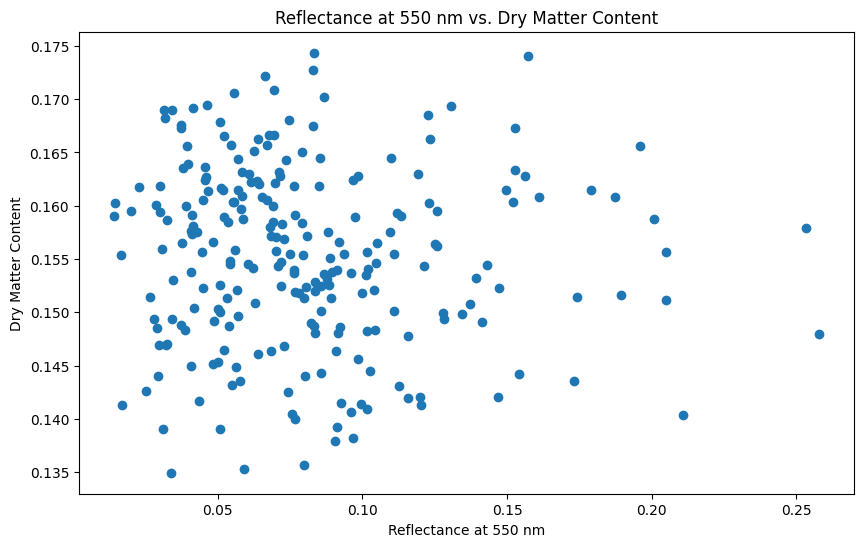

In [4]:

# Scatter plot of reflectance at 550 nm vs. dry matter content
wavelength_550 = '550'
plt.figure(figsize=(10, 6))
plt.scatter(apple_df[wavelength_550], apple_df['Dry matter'])
plt.xlabel('Reflectance at 550 nm')
plt.ylabel('Dry Matter Content')
plt.title('Reflectance at 550 nm vs. Dry Matter Content')
plt.show()


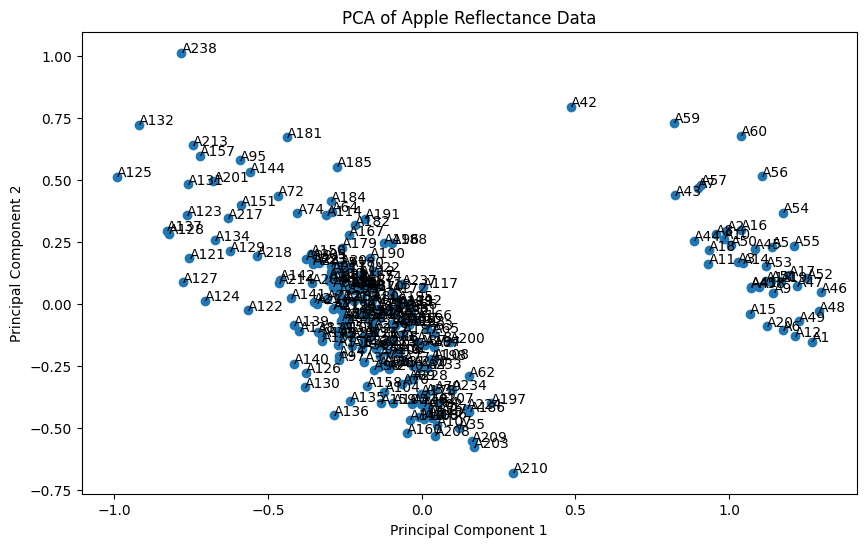

In [5]:

# PCA for dimensionality reduction
reflectance_data = apple_df.iloc[:, 2:].values
pca = PCA(n_components=2)
principal_components = pca.fit_transform(reflectance_data)

plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
for i in range(principal_components.shape[0]):
    plt.annotate(apple_df.iloc[i, 0], (principal_components[i, 0], principal_components[i, 1]))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Apple Reflectance Data')
plt.show()


In [7]:
# Estadísticas descriptivas generales para las longitudes de onda y el contenido de materia seca
reflectance_columns = apple_df.columns[2:]
descriptive_stats = apple_df.describe()
descriptive_stats

,Dry matter,430,434,438,442,446,450,454,458,462,...,954,958,962,966,970,974,978,982,986,990
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,0.155183,0.036035,0.037993,0.039921,0.042301,0.044511,0.046921,0.051608,0.056273,0.055309,...,0.580658,0.571127,0.562031,0.553243,0.546831,0.550117,0.553462,0.556043,0.547496,0.538159
std,0.008437,0.016216,0.015634,0.015221,0.015011,0.015084,0.015440,0.016299,0.017234,0.017849,...,0.042670,0.041897,0.041465,0.041316,0.041044,0.040456,0.040040,0.039867,0.040898,0.042098
min,0.134966,0.000000,0.005634,0.011360,0.013603,0.012946,0.012595,0.016208,0.019822,0.018613,...,0.479918,0.470488,0.461478,0.452745,0.446548,0.451401,0.456281,0.460148,0.448799,0.436783
25%,0.149324,0.025143,0.026518,0.029246,0.032040,0.033883,0.036580,0.040171,0.043862,0.043007,...,0.568200,0.560853,0.552793,0.544213,0.538155,0.544566,0.549134,0.552373,0.543630,0.528420
50%,0.155484,0.035231,0.036897,0.038758,0.041237,0.043059,0.045470,0.049661,0.054235,0.053176,...,0.594507,0.585256,0.576913,0.567623,0.561119,0.562528,0.564625,0.565786,0.558139,0.551541
75%,0.161498,0.046397,0.047474,0.048799,0.051244,0.054187,0.056957,0.061439,0.067047,0.065901,...,0.608174,0.597351,0.588345,0.579348,0.572279,0.575013,0.578949,0.582645,0.573634,0.564475
max,0.174347,0.092909,0.093024,0.093085,0.094273,0.096098,0.098979,0.107018,0.115058,0.116810,...,0.649203,0.634970,0.624236,0.616804,0.609585,0.610214,0.610980,0.613661,0.608831,0.605176


In [8]:

# Matriz de correlación entre la reflectancia y el contenido de materia seca
correlation_matrix = apple_df[reflectance_columns].corrwith(apple_df['Dry matter'])
correlation_matrix

430   -0.072476
434   -0.055808
438   -0.036957
442   -0.035627
446   -0.047591
         ...   
974   -0.101590
978   -0.111241
982   -0.117306
986   -0.104040
990   -0.092791
Length: 141, dtype: float64

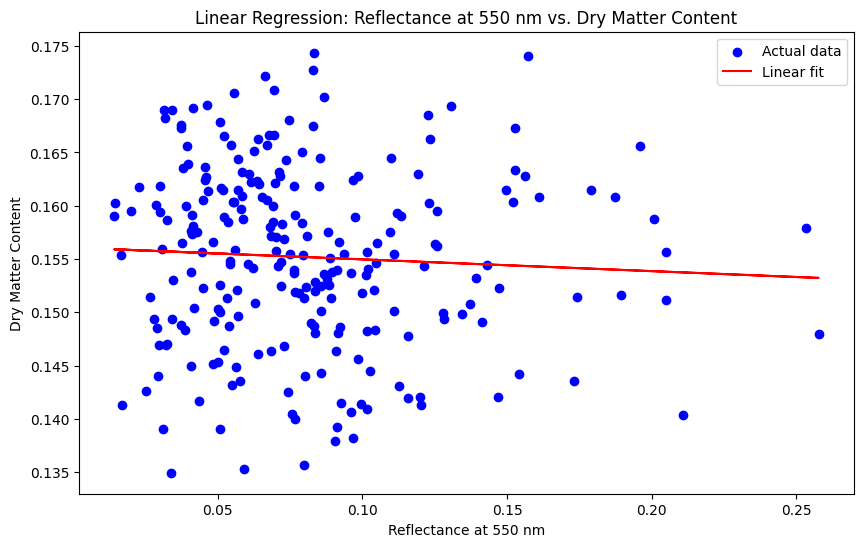

(array([-0.01101742]), 0.1560722357507389)

In [11]:

# Regresión lineal simple para predecir el contenido de materia seca a partir de la reflectancia a 550 nm
from sklearn.linear_model import LinearRegression

X = apple_df[['550']].values
y = apple_df['Dry matter'].values

linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred = linear_model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', label='Linear fit')
plt.xlabel('Reflectance at 550 nm')
plt.ylabel('Dry Matter Content')
plt.title('Linear Regression: Reflectance at 550 nm vs. Dry Matter Content')
plt.legend()
plt.show()

linear_model.coef_, linear_model.intercept_


In [13]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Preparar los datos
X = apple_df.iloc[:, 2:].values  # Datos de reflectancia
y = apple_df['Dry matter'].values  # Datos de materia seca

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión PLS
pls_model = PLSRegression(n_components=10)
pls_model.fit(X_train, y_train)

# Predecir el contenido de materia seca en el conjunto de prueba
y_pred = pls_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Resultados del modelo
print(f'Mean Squared Error: {mse}')
print(f'R²: {r2}')


Mean Squared Error: 5.047517978922733e-05
R²: 0.09952626825910016


In [15]:

try:
  import xgboost
except ImportError:
    !pip install xgboost

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Preparar los datos
X = apple_df.iloc[:, 2:].values
y = apple_df['Dry matter'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir y entrenar los modelos
models = {
    'Linear Regression': LinearRegression(),
    'PLS Regression': PLSRegression(n_components=10),
    'SVR': SVR(kernel='rbf'),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}

# Evaluar los modelos
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R²': r2}

results


  Using cached xgboost-2.1.0-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.0-py3-none-win_amd64.whl (124.9 MB)


{'Linear Regression': {'MSE': 0.00012519762843005738,
  'R²': -1.2335170701380105},
 'PLS Regression': {'MSE': 5.047517978922733e-05, 'R²': 0.09952626825910016},
 'SVR': {'MSE': 5.7084135155329085e-05, 'R²': -0.01837704038236465},
 'Random Forest': {'MSE': 3.7543022859898405e-05, 'R²': 0.3302350573756294},
 'XGBoost': {'MSE': 4.7531833647598865e-05, 'R²': 0.15203536074821733}}